In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
df_hits_page = pd.read_csv('../data/hits_page_credibility_data.csv', sep=',', header=None, names=['page_id', 'credibility'])
df_ours_page = pd.read_csv('../data/our_page_credibility_data_main.csv', sep=',', header=None, names=['page_id', 'credibility'])

df_hits_page = df_hits_page.sort_values(by=['credibility'], ascending=False)
df_ours_page = df_ours_page.sort_values(by=['credibility'], ascending=False)


## df_ours_page divide by max
df_ours_page['credibility'] = df_ours_page['credibility'] / df_ours_page['credibility'].max()

## get value of page_id 12 in hits_page
hits_page_12 = df_ours_page.loc[df_ours_page['page_id'] == 12]

df_ours_page['credibility'].max()

1.0

In [66]:
## mearge two dataframes
df_merged = pd.merge(df_hits_page, df_ours_page, on='page_id', how='inner', suffixes=('_hits', '_ours'))


df_hits_page['credibility'] = df_hits_page['credibility'] * 1 / df_hits_page['credibility'].max()

df_hits_page['credibility'].max()
df_hits_page.head(10)
## absolute difference
# df_merged['diff'] = abs(df_merged['credibility_hits'] - df_merged['credibility_ours'])
df_merged['diff'] = df_merged['credibility_ours'] -  df_merged['credibility_hits']




## sort by diff
df_merged = df_merged.sort_values(by=['diff'], ascending=False)

# df_merged.head(20)
# df_hits_page['credibility'] = df_hits_page['credibility']
# df_merged.head(20)

## our and hits credibility pf page 12
df_merged.loc[df_merged['page_id'] == 1806]

,page_id,credibility_hits,credibility_ours,diff
3,1806,0.017764,0.338941,0.321177


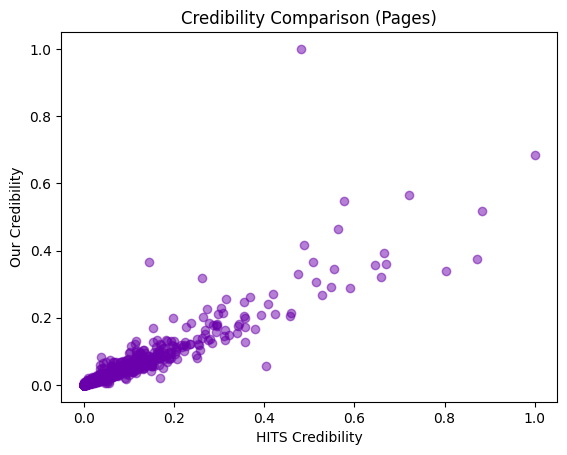

<Figure size 640x480 with 0 Axes>

In [67]:



## find which page has max credibility and drop it

# df_ours_page = df_ours_page.drop(df_ours_page[df_ours_page['credibility'] == 1].index)

# Join the two dataframes on page_id
df = pd.merge(df_hits_page, df_ours_page, on='page_id')

# Plot the credibility of the two methods with respect to each other
plt.scatter(df['credibility_x'], df['credibility_y'], c='#6A00AB', alpha=0.5)
plt.xlabel('HITS Credibility')
plt.ylabel('Our Credibility')
plt.title('Credibility Comparison (Pages)')
plt.show()

## save image in 'output-images' folder
plt.savefig('../output-images/credibility_comparison_pages.png')

In [68]:
df_hits_author = pd.read_csv('../data/hits_author_credibility_data.csv', sep=',', header=None, names=['author_id', 'credibility'])
df_ours_author = pd.read_csv('../data/our_author_credibility_data_main.csv', sep=',', header=None, names=['author_id', 'credibility'])

df_hits_author = df_hits_author.sort_values(by=['credibility'], ascending=False)
df_ours_author = df_ours_author.sort_values(by=['credibility'], ascending=False)

df_ours_author

,author_id,credibility
10,12,89.720969
15604,271058,84.220862
20514,433328,83.480424
37806,1574574,73.855660
9781,141644,67.546814
...,...,...
55940,3893177,0.012270
15599,270952,0.010831
48513,2674230,0.010831
3072,35696,0.010831


In [69]:
df_ours_author['credibility'] = df_ours_author['credibility'] / df_ours_author['credibility'].max()

df_ours_author = df_ours_author.sort_values(by=['author_id'], ascending=True)
df_hits_author = df_hits_author.sort_values(by=['author_id'], ascending=True)

df_hits_author['credibility'] = df_hits_author['credibility'] * 1 / df_hits_author['credibility'].max()

## sort data by credibility
df_ours_author = df_ours_author.sort_values(by=['credibility'], ascending=False)

## max of credibility - 0.3 or 0

# df_ours_author['credibility'] = df_ours_author['credibility']

# df_ours_author['credibility'] = df_ours_author['credibility'].clip(lower=0)

df_ours_author

,author_id,credibility
10,12,1.000000
15604,271058,0.938698
20514,433328,0.930445
37806,1574574,0.823171
9781,141644,0.752854
...,...,...
55940,3893177,0.000137
15599,270952,0.000121
48513,2674230,0.000121
3072,35696,0.000121


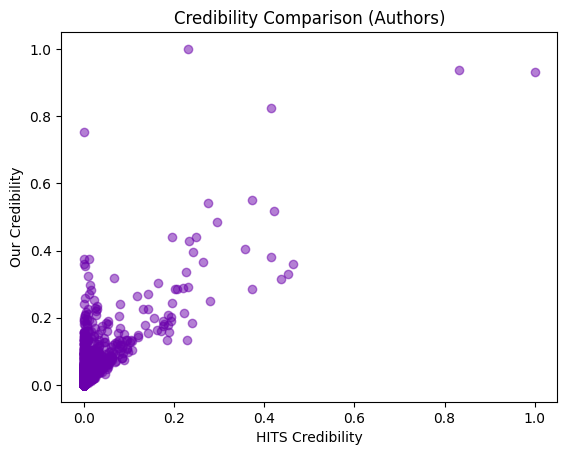

<Figure size 640x480 with 0 Axes>

In [70]:
# make author_id of df_hits_author and

# Join the two dataframes on author_id 
df = pd.merge(df_hits_author, df_ours_author, on='author_id')
df

# df
# Plot the credibility of the two methods with respect to each other
plt.scatter(df['credibility_x'], df['credibility_y'], c='#6A00AB', alpha=0.5)
plt.xlabel('HITS Credibility')
plt.ylabel('Our Credibility')
plt.title('Credibility Comparison (Authors)')
plt.show()

## save image in 'output-images' folder
plt.savefig('../output-images/credibility_comparison_author.png')